# Logistic Regression

In [18]:
import pandas as pd
df = pd.read_excel (r'C:\Users\HP\Downloads\Dataset.xlsx')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,INTENT,ID,Unnamed: 2
0,Please remove formatting from this page,18,NaN
1,left align the last word of selected paragraph,16,NaN
2,Kindly present all commands,24,NaN
3,remove strikethrough,13,
4,remove formatting from 5 lines above,18,NaN


In [19]:
df = pd.DataFrame(df) 
df.drop(['Unnamed: 2'], axis=1)
df.dropna(subset=['INTENT'], inplace=True)
df = df[['ID', 'INTENT']]
df.head()

,ID,INTENT
0,18,Please remove formatting from this page
1,16,left align the last word of selected paragraph
2,24,Kindly present all commands
3,13,remove strikethrough
4,18,remove formatting from 5 lines above


In [20]:
import re

def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens
df['intent_tokenized']=df['INTENT'].apply(lambda x:tokenize(x.lower()))
df.head()

,ID,INTENT,intent_tokenized
0,18,Please remove formatting from this page,"[please, remove, formatting, from, this, page]"
1,16,left align the last word of selected paragraph,"[left, align, the, last, word, of, selected, p..."
2,24,Kindly present all commands,"[kindly, present, all, commands]"
3,13,remove strikethrough,"[remove, strikethrough]"
4,18,remove formatting from 5 lines above,"[remove, formatting, from, 5, lines, above]"


In [21]:
import nltk
#stopword=nltk.download('stopwords')
stopword=nltk.corpus.stopwords.words('english')
stopword.append("please")
stopword.append("could")
stopword.append("need")
stopword.append(" ")
stopword.append("kindly")
def remove_stopword(tokenised_list):
    text=[word for word in tokenised_list if word not in stopword]
    return text
df['intent_nostop']=df['intent_tokenized'].apply(lambda x:remove_stopword(x))
df.head()

,ID,INTENT,intent_tokenized,intent_nostop
0,18,Please remove formatting from this page,"[please, remove, formatting, from, this, page]","[remove, formatting, page]"
1,16,left align the last word of selected paragraph,"[left, align, the, last, word, of, selected, p...","[left, align, last, word, selected, paragraph]"
2,24,Kindly present all commands,"[kindly, present, all, commands]","[present, commands]"
3,13,remove strikethrough,"[remove, strikethrough]","[remove, strikethrough]"
4,18,remove formatting from 5 lines above,"[remove, formatting, from, 5, lines, above]","[remove, formatting, 5, lines]"


In [22]:
ps=nltk.PorterStemmer()
def stemming(tokenised_list):
    text=[ps.stem(word) for word in tokenised_list ]
    return text
df['intent_nostop_stem']=df['intent_nostop'].apply(lambda x:stemming(x))
df.head()

,ID,INTENT,intent_tokenized,intent_nostop,intent_nostop_stem
0,18,Please remove formatting from this page,"[please, remove, formatting, from, this, page]","[remove, formatting, page]","[remov, format, page]"
1,16,left align the last word of selected paragraph,"[left, align, the, last, word, of, selected, p...","[left, align, last, word, selected, paragraph]","[left, align, last, word, select, paragraph]"
2,24,Kindly present all commands,"[kindly, present, all, commands]","[present, commands]","[present, command]"
3,13,remove strikethrough,"[remove, strikethrough]","[remove, strikethrough]","[remov, strikethrough]"
4,18,remove formatting from 5 lines above,"[remove, formatting, from, 5, lines, above]","[remove, formatting, 5, lines]","[remov, format, 5, line]"


In [23]:
#nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()
def lemmatizing(tokenised_list):
    text=[lm.lemmatize(word) for word in tokenised_list ]
    return text
df['intent_nostop_lem']=df['intent_nostop'].apply(lambda x:lemmatizing(x))
df.head()

,ID,INTENT,intent_tokenized,intent_nostop,intent_nostop_stem,intent_nostop_lem
0,18,Please remove formatting from this page,"[please, remove, formatting, from, this, page]","[remove, formatting, page]","[remov, format, page]","[remove, formatting, page]"
1,16,left align the last word of selected paragraph,"[left, align, the, last, word, of, selected, p...","[left, align, last, word, selected, paragraph]","[left, align, last, word, select, paragraph]","[left, align, last, word, selected, paragraph]"
2,24,Kindly present all commands,"[kindly, present, all, commands]","[present, commands]","[present, command]","[present, command]"
3,13,remove strikethrough,"[remove, strikethrough]","[remove, strikethrough]","[remov, strikethrough]","[remove, strikethrough]"
4,18,remove formatting from 5 lines above,"[remove, formatting, from, 5, lines, above]","[remove, formatting, 5, lines]","[remov, format, 5, line]","[remove, formatting, 5, line]"


In [24]:
stopwords_intent=[]
def clean_text_stem(text):
    tokens=re.split('\W+',text)
    [stopwords_intent.append(word) for word in tokens if word in stopword]
    text=[ps.stem(word) for word in tokens if word not in stopword]
    text=[word for word in text if word not in stopword]
    return text

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_stem=CountVectorizer(analyzer=clean_text_stem)
X_counts_stem=count_vect_stem.fit_transform(df['INTENT'])
print(X_counts_stem.shape)
print(count_vect_stem.get_feature_names())

(428, 94)
['', '2', '3', '5', 'Go', 'add', 'align', 'bold', 'break', 'bullet', 'centr', 'chang', 'charact', 'clear', 'color', 'command', 'comment', 'content', 'delet', 'dictat', 'display', 'emphas', 'emphasi', 'end', 'eras', 'exit', 'first', 'font', 'format', 'four', 'full', 'go', 'halt', 'help', 'icon', 'imag', 'insert', 'ital', 'italic', 'italicis', 'kindli', 'last', 'left', 'let', 'letter', 'line', 'list', 'make', 'middl', 'move', 'near', 'new', 'next', 'open', 'page', 'paragraph', 'part', 'paus', 'pictur', 'place', 'pleas', 'posit', 'present', 'previou', 'put', 'red', 'redo', 'remov', 'requir', 'reveal', 'right', 'select', 'sentenc', 'shift', 'show', 'start', 'stop', 'strike', 'strikethrough', 'subscript', 'superscript', 'symbol', 'tabl', 'take', 'termin', 'text', 'textoutlin', 'three', 'two', 'unbold', 'underlin', 'undo', 'unitalic', 'word']


In [26]:
X_counts_stem_df=pd.DataFrame(X_counts_stem.toarray())
X_counts_stem_df.columns=count_vect_stem.get_feature_names()
X_counts_stem_df.head()

,,2,3,5,Go,add,align,bold,break,bullet,...,termin,text,textoutlin,three,two,unbold,underlin,undo,unitalic,word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_features=X_counts_stem_df
X_features.head()

,,2,3,5,Go,add,align,bold,break,bullet,...,termin,text,textoutlin,three,two,unbold,underlin,undo,unitalic,word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Result 1

In [29]:
from sklearn.externals import joblib 
import os


In [30]:
from sklearn.model_selection import KFold, cross_val_score


In [31]:
def clean_text_lem(text):
    tokens=re.split('\W+',text)
    text=[lm.lemmatize(word) for word in tokens if word not in stopword]
    return text

In [32]:
count_vect_lem=CountVectorizer(analyzer=clean_text_lem)
X_counts_lem=count_vect_lem.fit_transform(df['INTENT'])
print(X_counts_lem.shape)
print(count_vect_lem.get_feature_names())

(428, 134)
['', '2', '3', '5', 'Add', 'Bold', 'Bullet', 'Bullets', 'Can', 'Change', 'Could', 'Delete', 'Display', 'Emphasize', 'End', 'Erase', 'Exit', 'Format', 'Four', 'Go', 'Halt', 'Help', 'Insert', 'Italicize', 'Kindly', 'Let', 'Make', 'Move', 'Paragraph', 'Please', 'Present', 'Put', 'Remove', 'Reveal', 'Show', 'Start', 'Stop', 'Take', 'Terminate', 'Unbold', 'Undo', 'What', 'You', 'add', 'align', 'bold', 'break', 'bullet', 'bulleted', 'centr', 'centre', 'change', 'character', 'clear', 'color', 'command', 'comment', 'content', 'delete', 'deleted', 'dictation', 'display', 'emphasis', 'emphasize', 'end', 'erase', 'exit', 'first', 'font', 'format', 'formatting', 'full', 'go', 'halt', 'help', 'icon', 'image', 'insert', 'inserting', 'italic', 'italicise', 'italicize', 'last', 'left', 'letter', 'line', 'list', 'make', 'middle', 'move', 'near', 'needed', 'new', 'next', 'open', 'page', 'paragraph', 'part', 'pause', 'picture', 'place', 'position', 'present', 'previous', 'red', 'redo', 'remove

In [33]:
X_counts_lem_df=pd.DataFrame(X_counts_lem.toarray())
X_counts_lem_df.columns=count_vect_lem.get_feature_names()
X_features=X_counts_lem_df
X_features.head()

,,2,3,5,Add,Bold,Bullet,Bullets,Can,Change,...,textoutline,three,two,unbold,underline,underlined,undo,unitalicize,unitalicized,word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Result 2

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_features, df['ID'], test_size=0.3, random_state=0)
clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
clf1.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8449612403100775

In [35]:
 joblib.dump(clf1, 'clf1')
os.path.getsize('clf1')

29141

In [36]:
k_fold=KFold(n_splits=7)
cross_val_score(clf1,X_features,df['ID'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.93548387, 0.90163934, 0.93442623, 0.93442623, 0.85245902,
       0.83606557, 0.90163934])

In [37]:
def clean_text_stem_tf(text):
    text = "".join([word.lower() for word in text])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text_stem_tf)
X_tfidf = tfidf_vect.fit_transform(df['INTENT'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(428, 92)
['', '2', '3', '5', 'add', 'align', 'bold', 'break', 'bullet', 'centr', 'chang', 'charact', 'clear', 'color', 'command', 'comment', 'content', 'delet', 'dictat', 'display', 'emphas', 'emphasi', 'end', 'eras', 'exit', 'first', 'font', 'format', 'four', 'full', 'go', 'halt', 'help', 'icon', 'imag', 'insert', 'ital', 'italic', 'italicis', 'last', 'left', 'let', 'letter', 'line', 'list', 'make', 'middl', 'move', 'near', 'need', 'new', 'next', 'open', 'page', 'paragraph', 'part', 'paus', 'pictur', 'place', 'posit', 'present', 'previou', 'put', 'red', 'redo', 'remov', 'requir', 'reveal', 'right', 'select', 'sentenc', 'shift', 'show', 'start', 'stop', 'strike', 'strikethrough', 'subscript', 'superscript', 'symbol', 'tabl', 'take', 'termin', 'text', 'textoutlin', 'three', 'two', 'unbold', 'underlin', 'undo', 'unitalic', 'word']


In [323]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,2,3,5,add,align,bold,break,bullet,centr,...,termin,text,textoutlin,three,two,unbold,underlin,undo,unitalic,word
0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.52974,0.0,0.0,0.0,0.0,0.0,0.652095,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.682972,0.00000,0.0,0.0,0.44038,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.45082,0.0,0.0,0.00000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Result 3

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, df['ID'], test_size=0.3, random_state=0)
clf2 = LogisticRegression(random_state=0).fit(X_train, y_train)
clf2.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9224806201550387

In [325]:
joblib.dump(clf2, 'clf2')
os.path.getsize('clf2')

20405

In [326]:
k_fold=KFold(n_splits=7)
cross_val_score(clf2,X_features,df['ID'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.87096774, 0.86885246, 0.90163934, 0.91803279, 0.86885246,
       0.93442623, 0.91803279])

In [327]:
def clean_text_stem_ngram(text):
    text = "".join([word.lower() for word in text])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword])
    return text
X_ngram_stem = df['INTENT'].apply(lambda x: clean_text_stem_ngram(x))
X_ngram_stem.head()

0          stop dictat
1     undo select text
2    clear superscript
3      add next bullet
4     right align imag
Name: INTENT, dtype: object

In [328]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(1,3))
X_counts = ngram_vect.fit_transform(X_ngram_stem)
print(X_counts.shape)
print(ngram_vect.get_feature_names()[:5])

(428, 568)
['add', 'add bullet', 'add comment', 'add comment word', 'add next']


In [329]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = ngram_vect.get_feature_names()
X_counts_df.head()

,add,add bullet,add comment,add comment word,add next,add next bullet,align,align content,align first,align first word,...,word font red,word format,word line,word paragraph,word red,word red color,word select,word select paragraph,word sentenc,word underlin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Result 4

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X_counts_df, df['ID'], test_size=0.3, random_state=0)
clf3 = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf3.score(X_test, y_test))
joblib.dump(clf3, 'clf3')
print(os.path.getsize('clf3'))
k_fold=KFold(n_splits=7)
print(cross_val_score(clf3,X_features,df['ID'],cv=k_fold,scoring='accuracy',n_jobs=-1))

0.9457364341085271
119414
[0.87096774 0.86885246 0.90163934 0.91803279 0.86885246 0.93442623
 0.91803279]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Analysis

In [331]:
print(stopwords_intent[:5])

['can', 'you', 'the', 'please', 'from']


In [332]:
print(df["intent_nostop_stem"][:5])

0          [stop, dictat]
1    [undo, select, text]
2    [clear, superscript]
3     [add, next, bullet]
4    [right, align, imag]
Name: intent_nostop_stem, dtype: object


In [333]:
all_token_intent=[]
all_token_intent=all_token_intent+[(lis) for lis in df["intent_nostop_stem"]]

In [334]:
print(all_token_intent[:5])

[['stop', 'dictat'], ['undo', 'select', 'text'], ['clear', 'superscript'], ['add', 'next', 'bullet'], ['right', 'align', 'imag']]


In [335]:
flat_list = [item for sublist in all_token_intent for item in sublist]

In [336]:
freq={}
def CountFrequency(my_list): 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

In [337]:
CountFrequency(flat_list)


In [338]:
print(freq)


{'stop': 22, 'dictat': 38, 'undo': 28, 'select': 53, 'text': 57, 'clear': 13, 'superscript': 23, 'add': 5, 'next': 12, 'bullet': 38, 'right': 19, 'align': 42, 'imag': 6, 'insert': 25, 'line': 29, 'page': 6, 'remov': 74, 'bold': 40, 'underlin': 53, 'word': 72, 'delet': 22, 'show': 10, 'help': 13, 'sentenc': 27, 'comment': 15, 'last': 83, 'start': 9, 'centr': 14, '': 15, 'open': 9, 'command': 21, 'format': 35, 'posit': 4, 'middl': 9, 'strikethrough': 27, 'first': 15, 'two': 33, 'charact': 29, 'subscript': 20, '3': 2, 'paragraph': 33, 'reveal': 1, 'make': 10, 'take': 2, 'break': 2, 'ital': 18, 'end': 8, 'pictur': 1, 'strike': 7, 'go': 4, 'unitalic': 5, 'italic': 7, 'three': 4, 'red': 2, 'color': 1, 'emphas': 5, 'display': 7, 'list': 3, 'paus': 13, 'near': 24, 'eras': 3, 'tabl': 9, 'move': 6, 'left': 13, '2': 6, 'emphasi': 3, 'full': 1, 'place': 2, 'unbold': 6, 'need': 1, 'chang': 5, 'italicis': 4, 'font': 1, 'icon': 3, 'exit': 2, 'letter': 2, 'content': 4, '5': 1, 'halt': 3, 'present': 3,

In [339]:
keys=list(freq.keys())
values=list(freq.values())


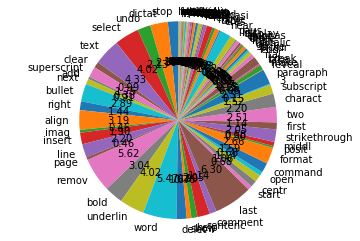

In [340]:
import matplotlib.pyplot as plotter
figureObject, axesObject = plotter.subplots()
axesObject.pie(values,

        labels=keys,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')

 

plotter.show()

In [292]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)